# Intro to Time Series

[Time Series](https://en.wikipedia.org/wiki/Time_series) represents data indexed by dates, points in time, time periods, etc. The simplest example that comes to mind is stock prices: the price of a stock per day over a period of time.

But Time Series have applications in many other fields, specially in experimental sciences: physics, biology, medicine, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

A simple Time Series in Pandas can be represented as a regular `Series` object:

In [2]:
timestamps = [
    datetime(2018, 1, 1), datetime(2018, 1, 2), datetime(2018, 1, 3),
    datetime(2018, 1, 4), datetime(2018, 1, 5), datetime(2018, 1, 6),
    datetime(2018, 1, 7), datetime(2018, 1, 8), datetime(2018, 1, 9),
]

In [3]:
ts = pd.Series(np.random.randn(9) * 10 + 500, index=timestamps)

In [4]:
ts

2018-01-01    506.542629
2018-01-02    501.988981
2018-01-03    503.798556
2018-01-04    515.338029
2018-01-05    501.517772
2018-01-06    497.673548
2018-01-07    519.599338
2018-01-08    498.414425
2018-01-09    490.789966
dtype: float64

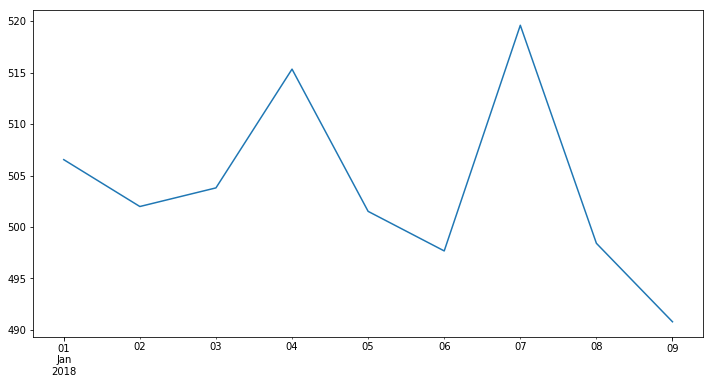

In [5]:
ts.plot(figsize=(12, 6))

The `Index` of a Time Series will be a `DatetimeIndex` (or similar, like ` TimedeltaIndex` or `PeriodIndex`):

In [6]:
ts.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq=None)

Underneath, Pandas uses `numpy` datetime types:

In [7]:
ts.index.dtype

dtype('<M8[ns]')

### `pd.Timestamp`

We created our series's index with `datetime` objects. `datetime` is the Python builtin data type to represent dates and times. Pandas has another type `pd.Tiemstamp` that's a little bit more powerful:

In [8]:
pd.Timestamp(2018, 1, 1)

Timestamp('2018-01-01 00:00:00')

In [9]:
pd.Timestamp(datetime(2018, 1, 1))

Timestamp('2018-01-01 00:00:00')

In [10]:
pd.Timestamp('2018-01-01')

Timestamp('2018-01-01 00:00:00')

Each index element in our Series, is a `pd.Timestamp` object:

In [11]:
ts.index[0]

Timestamp('2018-01-01 00:00:00')

`Timestamp`s can be constructed in different ways (we'll see them throughout this lesson), but a few examples include:

In [12]:
pd.Timestamp('Jan 1 2018')

Timestamp('2018-01-01 00:00:00')

In [13]:
pd.Timestamp('January 1st 2018')

Timestamp('2018-01-01 00:00:00')

In [14]:
pd.Timestamp('1st of January 2018')

Timestamp('2018-01-01 00:00:00')

In [15]:
pd.Timestamp('2018-01')

Timestamp('2018-01-01 00:00:00')

In [16]:
pd.Timestamp('1/2018')

Timestamp('2018-01-01 00:00:00')

In [17]:
pd.Timestamp(datetime(2018, 1, 1))

Timestamp('2018-01-01 00:00:00')

**Warning:** Be aware of ambiguity with "American" and "European" calendar style. pandas will favor the "American" style. Example:

In [18]:
pd.Timestamp('1/7/2018')

Timestamp('2018-01-07 00:00:00')

### Indexing Time Series

Time Series are regular pandas Series (or DataFrames), indexing works in the same way as with regular objects:

In [19]:
ts

2018-01-01    506.542629
2018-01-02    501.988981
2018-01-03    503.798556
2018-01-04    515.338029
2018-01-05    501.517772
2018-01-06    497.673548
2018-01-07    519.599338
2018-01-08    498.414425
2018-01-09    490.789966
dtype: float64

In [20]:
ts[datetime(2018, 1, 3)]

503.79855566182675

In [21]:
ts[pd.Timestamp(2018, 1, 3)]

503.79855566182675

It's really convenient to use Strings to refer to datetimes:

In [22]:
ts['2018-01-03']

503.79855566182675

Time Series are usually ordered, which makes range selection (slicing) a lot easier:

In [23]:
ts['2018-01-03': '2018-01-06']

2018-01-03    503.798556
2018-01-04    515.338029
2018-01-05    501.517772
2018-01-06    497.673548
dtype: float64

Even if the actual points don't exist:

In [24]:
ts

2018-01-01    506.542629
2018-01-02    501.988981
2018-01-03    503.798556
2018-01-04    515.338029
2018-01-05    501.517772
2018-01-06    497.673548
2018-01-07    519.599338
2018-01-08    498.414425
2018-01-09    490.789966
dtype: float64

In [25]:
ts['2018-01-03T18:00:00': '2018-01-06T21:30:00']

2018-01-04    515.338029
2018-01-05    501.517772
2018-01-06    497.673548
dtype: float64

The precision of your index might change. You might be indexing by dates, dates and times, periods, years, months, etc. Pandas tries to interpret your indexes based on the precision:

In [26]:
timestamps = [
    datetime(2018, 1, 1), datetime(2018, 1, 2), datetime(2018, 1, 3),
    datetime(2018, 2, 1), datetime(2018, 2, 2), datetime(2018, 2, 3),
    datetime(2019, 1, 1), datetime(2019, 1, 2), datetime(2019, 1, 3),
]

In [27]:
ts = pd.Series(np.random.randn(9) * 10 + 500, index=timestamps)

In [28]:
ts

2018-01-01    495.398277
2018-01-02    511.052296
2018-01-03    484.559228
2018-02-01    508.486572
2018-02-02    518.421685
2018-02-03    494.072446
2019-01-01    505.173909
2019-01-02    507.592003
2019-01-03    491.901922
dtype: float64

In [29]:
ts['2018']

2018-01-01    495.398277
2018-01-02    511.052296
2018-01-03    484.559228
2018-02-01    508.486572
2018-02-02    518.421685
2018-02-03    494.072446
dtype: float64

In [30]:
ts['2019']

2019-01-01    505.173909
2019-01-02    507.592003
2019-01-03    491.901922
dtype: float64

In [31]:
ts['2018-01']

2018-01-01    495.398277
2018-01-02    511.052296
2018-01-03    484.559228
dtype: float64

### Creating DateTimeIndexes

Suppose you have a list (series, array) of sales, that you know they correspond with a given period of time. For example, you have 10 sales, which you know correspond to the days January 1st 2018, January 2nd 2018, etc. How can you construct the DateTime index? A naive approach would use an iteration to fill a list, or an array with values. But pandas has a really convenient function called `pd.date_range` that can help you generate these indexes in a smart way:

In [32]:
sales = np.random.randn(10) * 10 + 500
sales

array([488.54546295, 498.0050166 , 489.19365795, 511.92011379,
       499.665299  , 494.3158866 , 494.65239081, 516.20098258,
       496.71425391, 514.09930218])

In this case, the start date is `2018-01-01` and the "frequency" is "daily":

In [33]:
index = pd.date_range(start='2018-01-01', periods=len(sales), freq='D')
index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10'],
              dtype='datetime64[ns]', freq='D')

In [34]:
pd.date_range('2018-01-01', '2018-01-03', freq='T')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00', '2018-01-01 00:05:00',
               '2018-01-01 00:06:00', '2018-01-01 00:07:00',
               '2018-01-01 00:08:00', '2018-01-01 00:09:00',
               ...
               '2018-01-02 23:51:00', '2018-01-02 23:52:00',
               '2018-01-02 23:53:00', '2018-01-02 23:54:00',
               '2018-01-02 23:55:00', '2018-01-02 23:56:00',
               '2018-01-02 23:57:00', '2018-01-02 23:58:00',
               '2018-01-02 23:59:00', '2018-01-03 00:00:00'],
              dtype='datetime64[ns]', length=2881, freq='T')

In [35]:
pd.Series(sales, index=index)

2018-01-01    488.545463
2018-01-02    498.005017
2018-01-03    489.193658
2018-01-04    511.920114
2018-01-05    499.665299
2018-01-06    494.315887
2018-01-07    494.652391
2018-01-08    516.200983
2018-01-09    496.714254
2018-01-10    514.099302
Freq: D, dtype: float64

`freq` is a really common and useful parameter when dealing with TimeSeries in pandas. Many datetime related functions accept the freq parameter. `freq` can go from nanoseconds to years, it's really versatile:


<img src="https://user-images.githubusercontent.com/872296/38993075-f6d81e2c-43b8-11e8-9f75-9faa8fe3b5ce.png" width=600></img>

Example, we can change the frequency to be "every minute":

In [36]:
pd.Series(sales, index=pd.date_range(start='2018-01-01', periods=len(sales), freq='T'))

2018-01-01 00:00:00    488.545463
2018-01-01 00:01:00    498.005017
2018-01-01 00:02:00    489.193658
2018-01-01 00:03:00    511.920114
2018-01-01 00:04:00    499.665299
2018-01-01 00:05:00    494.315887
2018-01-01 00:06:00    494.652391
2018-01-01 00:07:00    516.200983
2018-01-01 00:08:00    496.714254
2018-01-01 00:09:00    514.099302
Freq: T, dtype: float64

Or "every 5 minutes":

In [37]:
pd.Series(sales, index=pd.date_range(start='2018-01-01', periods=len(sales), freq='5T'))

2018-01-01 00:00:00    488.545463
2018-01-01 00:05:00    498.005017
2018-01-01 00:10:00    489.193658
2018-01-01 00:15:00    511.920114
2018-01-01 00:20:00    499.665299
2018-01-01 00:25:00    494.315887
2018-01-01 00:30:00    494.652391
2018-01-01 00:35:00    516.200983
2018-01-01 00:40:00    496.714254
2018-01-01 00:45:00    514.099302
Freq: 5T, dtype: float64

`pd.date_range` is very flexible (as pandas in general), so you can do things like:

In [38]:
pd.date_range('2018 May 1st', '2018 Jul 3', freq = 'D')

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12',
               '2018-05-13', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-09',
               '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13',
               '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17',
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-23', '2018-06-24', '2018-06-25',
      

In [39]:
pd.date_range('2018 May 1st', '2018 Jul 3', freq = 'B')

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07',
               '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-13',
               '2018-06-14', '2018-06-15', '2018-06-18', '2018-06-19',
               '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-25',
               '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
               '2018-07-02', '2018-07-03'],
              dtype='datetime64[ns]', freq='B')

### `timedelta`s and Date Offsets

Pandas handles frequencies as "Date Offset". You'll generally use aliases for the `freq` parameter (as we saw above), but you can also create the objects directly. These Date Offset objects resemble Python builtin `datetime.timedelta` objects:

In [40]:
from pandas.tseries.offsets import Hour, Minute
from datetime import timedelta

In [41]:
pd.Timestamp('2018-01-01') + timedelta(hours=3)

Timestamp('2018-01-01 03:00:00')

In [42]:
pd.Timestamp('2018-01-01') + Hour(3)

Timestamp('2018-01-01 03:00:00')

In [43]:
datetime(2018, 1, 1) + timedelta(hours=3)

datetime.datetime(2018, 1, 1, 3, 0)

In [44]:
datetime(2018, 1, 1) + Hour(3)

Timestamp('2018-01-01 03:00:00')

In [45]:
pd.Timestamp('2018-01-01') + Hour(3) + (5 * Minute())

Timestamp('2018-01-01 03:05:00')

In [46]:
pd.Timestamp('2018-01-01') + Hour(3) + Minute(5)

Timestamp('2018-01-01 03:05:00')

### More advanced Date Frequencies

Pandas can handle more complex offsets like Business days, holidays, etc. Another interesting example is when you handle "week of month" periods. For example, you have data that corresponds with the 3rd Saturday of every month. For that, you'll use the `WOM` freq alias:

<img src="img/calendar_2018.png" width=600></img>

In [47]:
pd.date_range(start='2018-01-01', periods=12, freq='WOM-3SAT')

DatetimeIndex(['2018-01-20', '2018-02-17', '2018-03-17', '2018-04-21',
               '2018-05-19', '2018-06-16', '2018-07-21', '2018-08-18',
               '2018-09-15', '2018-10-20', '2018-11-17', '2018-12-15'],
              dtype='datetime64[ns]', freq='WOM-3SAT')